In [11]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt

In [5]:
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO = ml.open_material('ITO_Nanya', 'Material')
ITO_LT = ml.open_material('ITO_LT_Nanya', 'Material')
sodalime = ml.open_material('sodalime_Nanya', 'Material')
air = ml.Non_Dispersion(1)

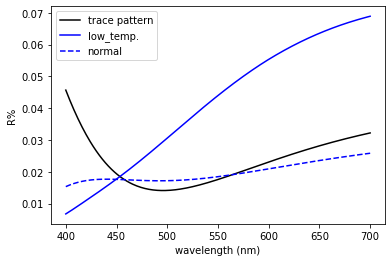

0.024770221560472146
0.004572882170322874


In [34]:
wl = np.linspace(400, 700, 301)

LT = tm.Design(
    [air, SiO2, ITO_LT, SiO2, NB, sodalime],
    [None, 75, 30, 45, 8, None]
)

tra = tm.Design(
    [air, SiO2, SiO2, NB, sodalime],
    [None, 75, 45, 8, None]
)

NO = tm.Design(
    [air, SiO2, ITO, SiO2, NB, sodalime],
    [None, 75, 30, 45, 8, None]
)

R_LT = LT.reflectance(wl)
R_NO = NO.reflectance(wl)
R_tra = tra.reflectance(wl)

plt.plot(wl, R_tra, '-k', label = 'trace pattern')
plt.plot(wl, R_LT, '-b', label = 'low_temp.')
plt.plot(wl, R_NO, '--b', label = 'normal')
plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)')
plt.ylabel('R%')
#plt.savefig('low_temp.png')
plt.show()
print(np.mean(abs(R_LT-R_tra)))
print(np.mean(abs(R_NO-R_tra)))

In [31]:
#pd.DataFrame({'wl':wl, 'low_temp':R_LT, 'normal':R_NO, 'trace pattern':R_tra}).to_csv('Low_temp.csv')